# Class 8

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
from sklearn import tree

#Train test split
from sklearn.model_selection import train_test_split

import seaborn as sns

from matplotlib import pyplot as plt
import matplotlib.colors as colors #for custom colors

In [2]:
df = pd.read_csv("/kaggle/input/datanew/heart_failure.csv")

In [3]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
#import seaborn as sns

<AxesSubplot: xlabel='DEATH_EVENT', ylabel='count'>

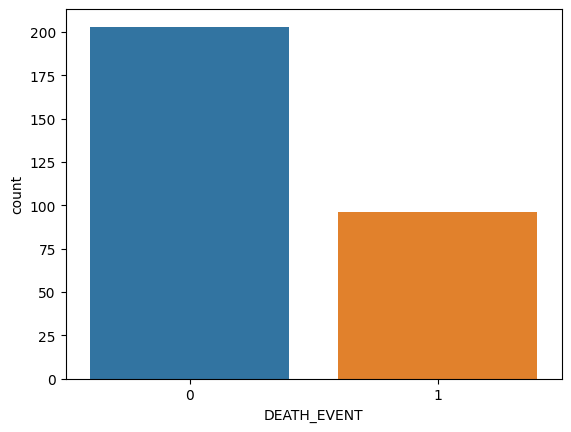

In [5]:
sns.countplot(x="DEATH_EVENT",data=df)

In [6]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


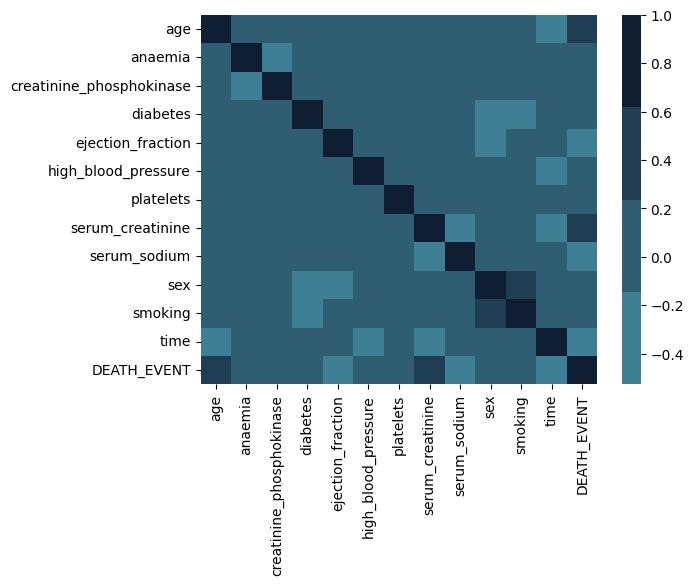

In [7]:
#heatmap
#from matplotlib import pyplot as plt
#import matplotlib.colors as colors #for custom colors

corr = df.corr()

# Define the colors for the custom colormap
colors_list = ['#3f7f93', '#2f5e73', '#1f3e53', '#0f1e33']

# Create a custom colormap using ListedColormap
cmap = colors.ListedColormap(colors_list)

# Generate a heatmap using Seaborn
sns.heatmap(corr, cmap=cmap)

# Display the heatmap
plt.show()

<AxesSubplot: >

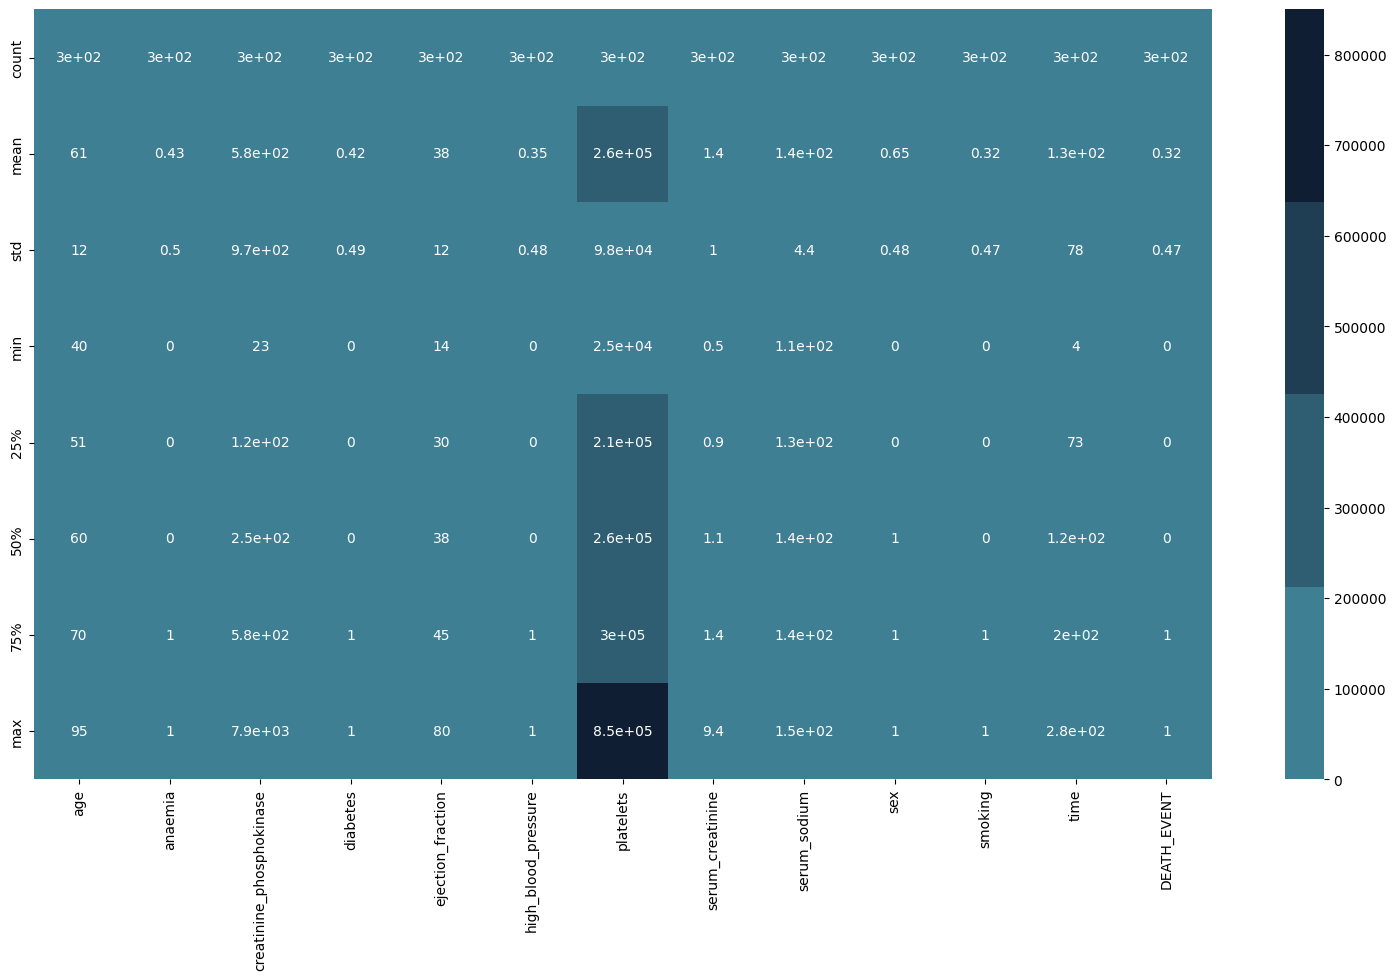

In [8]:
plt.figure(figsize=(19,10))
sns.heatmap(df.describe(), annot=True, cmap=cmap)

In [9]:
df.nunique()

age                          47
anaemia                       2
creatinine_phosphokinase    208
diabetes                      2
ejection_fraction            17
high_blood_pressure           2
platelets                   176
serum_creatinine             40
serum_sodium                 27
sex                           2
smoking                       2
time                        148
DEATH_EVENT                   2
dtype: int64

<AxesSubplot: xlabel='diabetes', ylabel='count'>

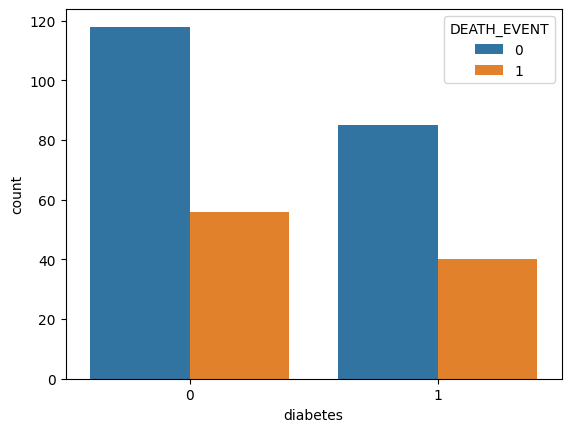

In [10]:
# diabetics value in respect to DEATH_EVENT 
sns.countplot(x="diabetes",hue="DEATH_EVENT",data=df)

<AxesSubplot: xlabel='high_blood_pressure', ylabel='count'>

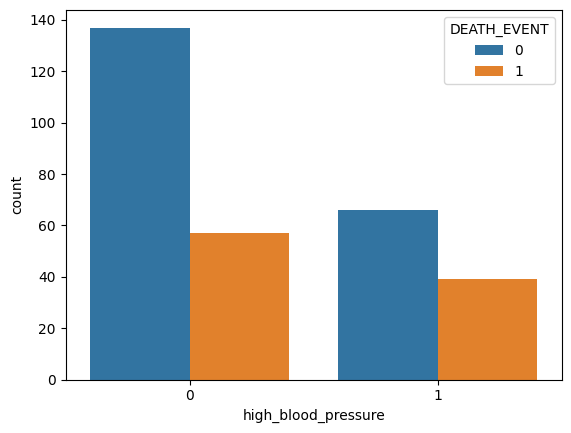

In [11]:
sns.countplot(x="high_blood_pressure",hue="DEATH_EVENT",data=df)

<AxesSubplot: xlabel='smoking', ylabel='count'>

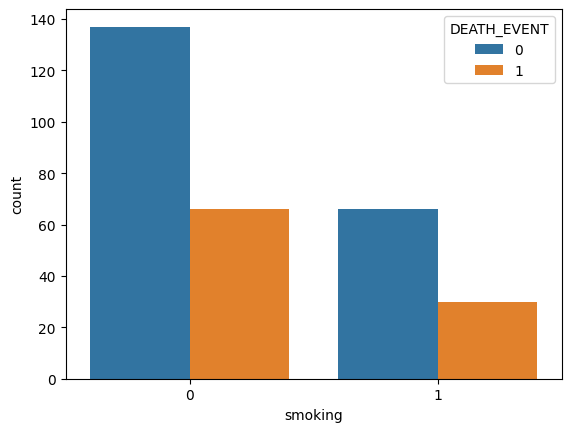

In [12]:
sns.countplot(x="smoking",hue="DEATH_EVENT",data=df)

In [13]:
x = df.drop("DEATH_EVENT",axis=1)

In [14]:
y = df["DEATH_EVENT"]

In [15]:
x.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8


In [16]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: DEATH_EVENT, dtype: int64

In [17]:
#Train test split
#from sklearn.model_selection import train_test_split

In [18]:
#train=70%
#test=30%

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.30,random_state=1) #train_size=.70

In [19]:
xtrain.shape

(209, 12)

In [20]:
xtrain

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
14,49.0,1,80,0,30,1,427000.0,1.0,138,0,0,12
210,70.0,0,212,1,17,1,389000.0,1.0,136,1,1,188
236,75.0,0,119,0,50,1,248000.0,1.1,148,1,0,209
44,60.0,1,588,1,60,0,194000.0,1.1,142,0,0,33
163,50.0,1,2334,1,35,0,75000.0,0.9,142,0,0,126
...,...,...,...,...,...,...,...,...,...,...,...,...
203,60.0,0,59,0,25,1,212000.0,3.5,136,1,1,187
255,52.0,1,191,1,30,1,334000.0,1.0,142,1,1,216
72,85.0,0,5882,0,35,0,243000.0,1.0,132,1,1,72
235,77.0,1,109,0,50,1,406000.0,1.1,137,1,0,209


In [21]:
xtest.shape

(90, 12)

## Decision Tree

In [22]:
from sklearn.tree import DecisionTreeClassifier

In [23]:
clf = DecisionTreeClassifier()

In [24]:
clf.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [25]:
pred = clf.predict(xtest)
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1])

In [26]:
np.array(ytest) ##Actual result

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1])

In [27]:
from sklearn.metrics import classification_report,accuracy_score,precision_score
from sklearn.metrics import confusion_matrix,roc_curve,recall_score,f1_score,roc_auc_score,RocCurveDisplay

In [28]:
from scikitplot.metrics import plot_roc_curve

In [29]:
c_rep = classification_report(ytest,pred)
print(c_rep)

              precision    recall  f1-score   support

           0       0.85      0.89      0.87        64
           1       0.70      0.62      0.65        26

    accuracy                           0.81        90
   macro avg       0.77      0.75      0.76        90
weighted avg       0.81      0.81      0.81        90



In [30]:
cm = confusion_matrix(ytest,pred)
cm

array([[57,  7],
       [10, 16]])

In [31]:
accuracy_score(ytest,pred)

0.8111111111111111

In [32]:
tp, fn, fp, tn = confusion_matrix(ytest,pred).reshape(-1) #match dimensions

In [33]:
print(tp, " ", fp, " ", tn, " ", fn)

57   10   16   7


<AxesSubplot: >

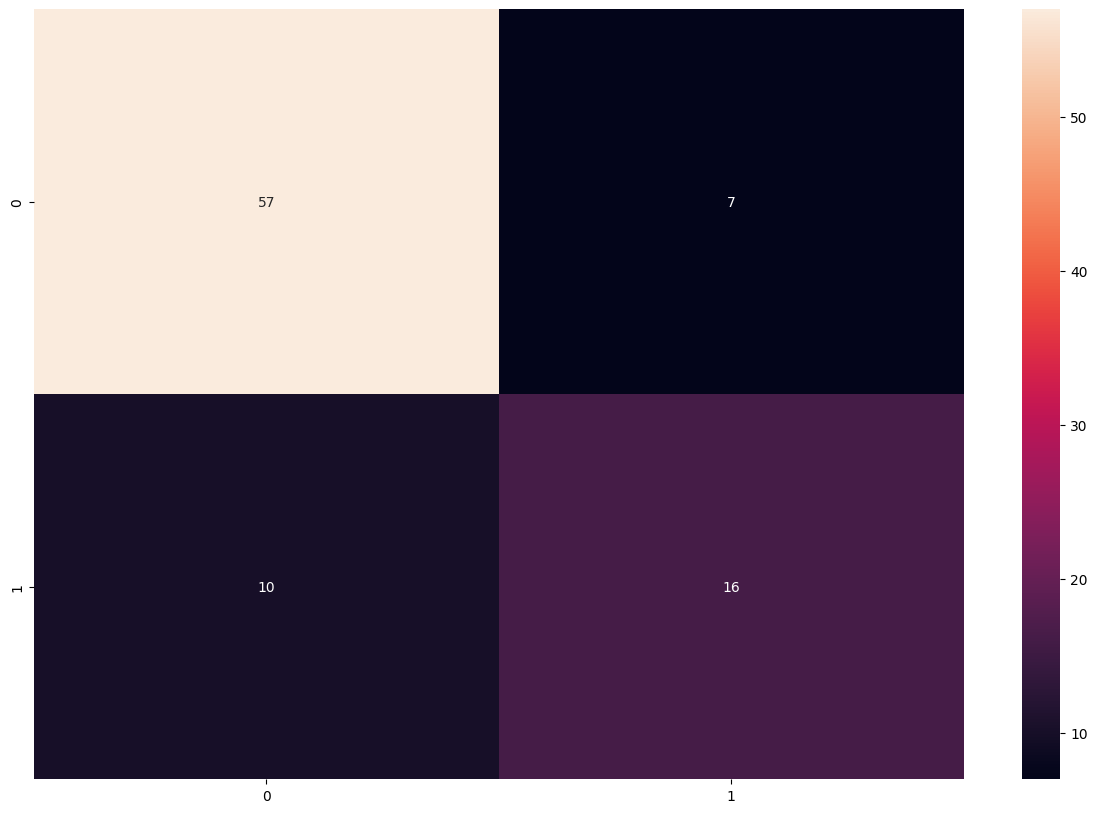

In [34]:
plt.figure(figsize=(15,10))
sns.heatmap(cm, annot=True)

<AxesSubplot: >

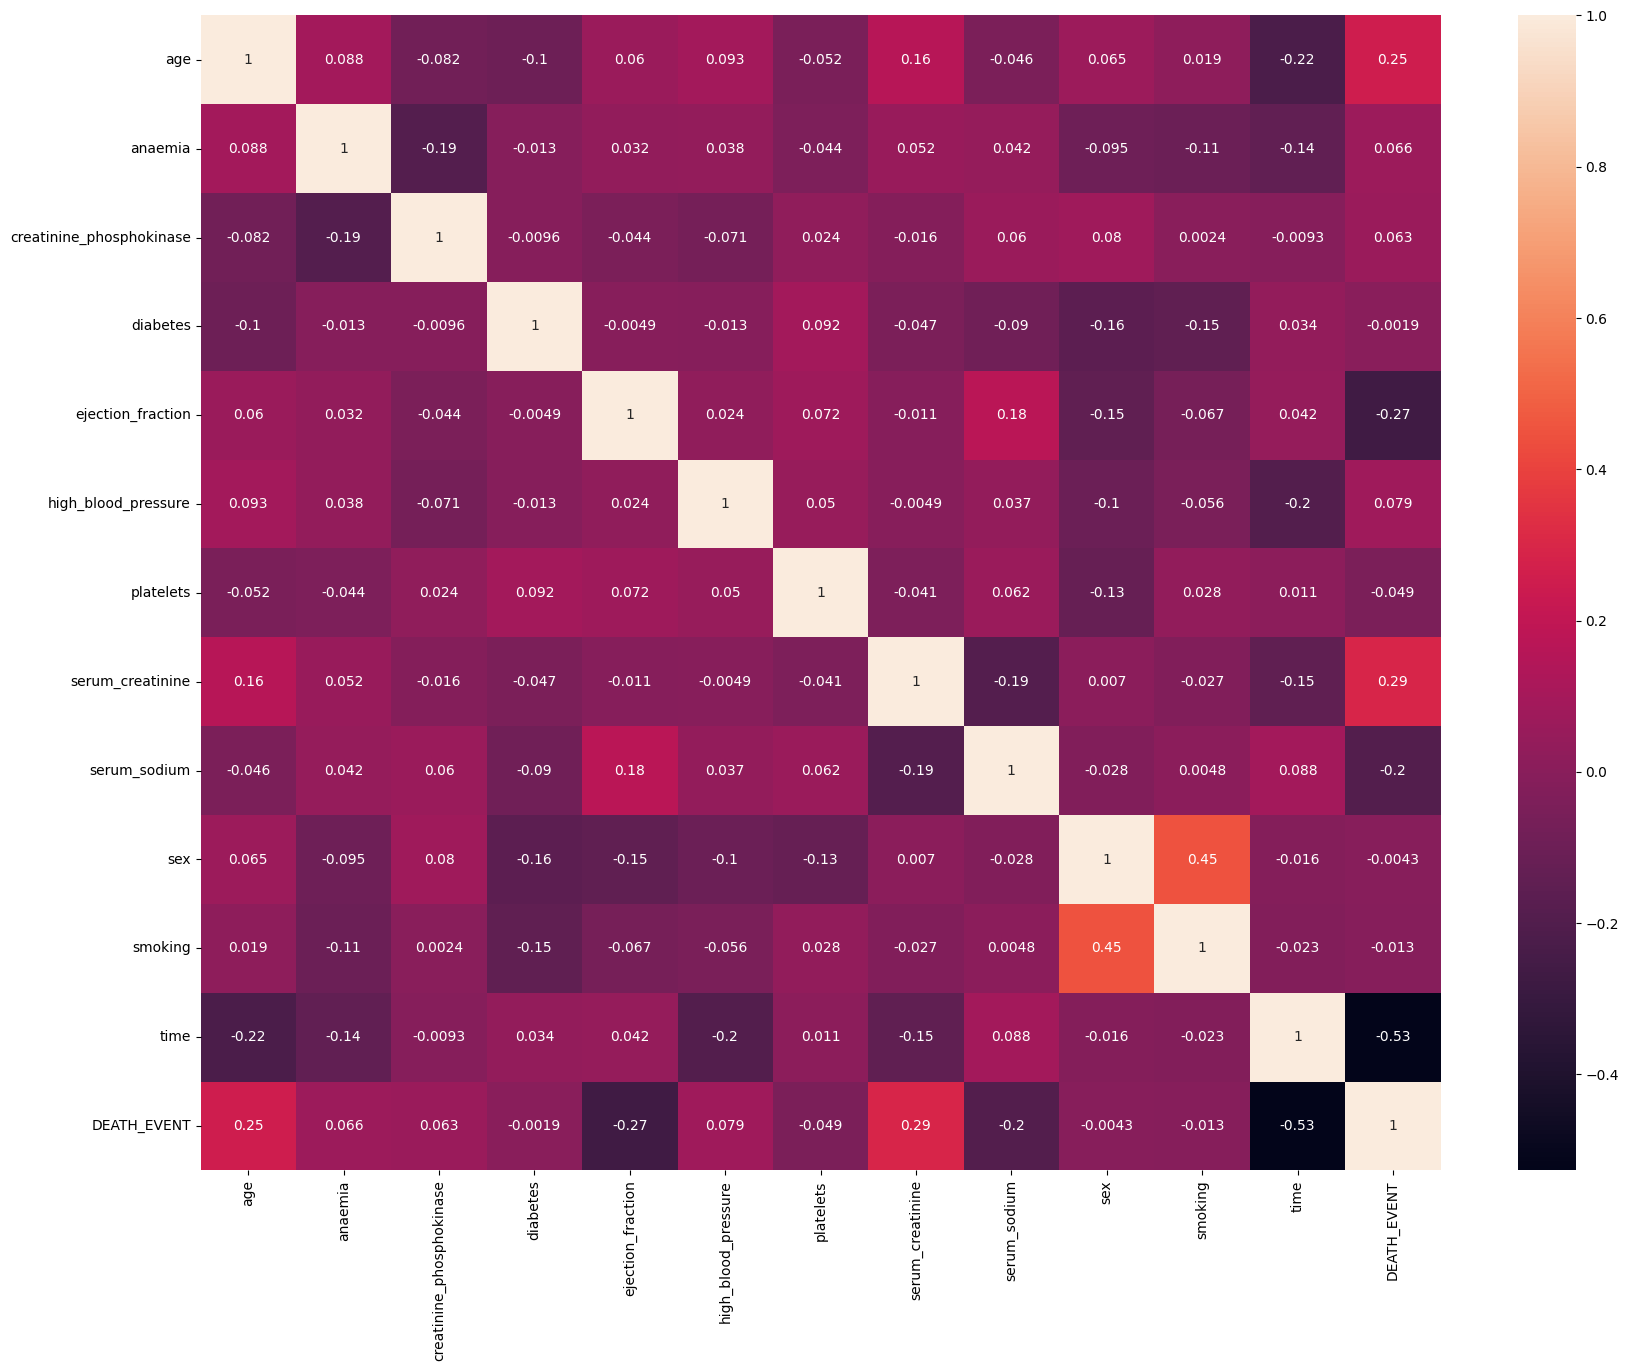

In [35]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), annot=True)

## ROC

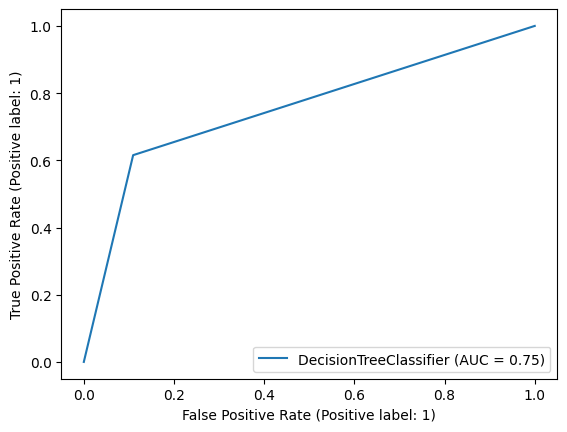

In [36]:
RocCurveDisplay.from_estimator(clf,xtest,ytest)

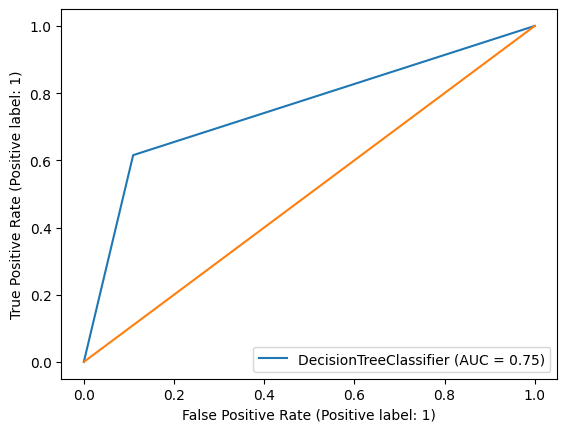

In [37]:
RocCurveDisplay.from_estimator(clf,xtest,ytest)
plt.plot([0,1],[0,1])

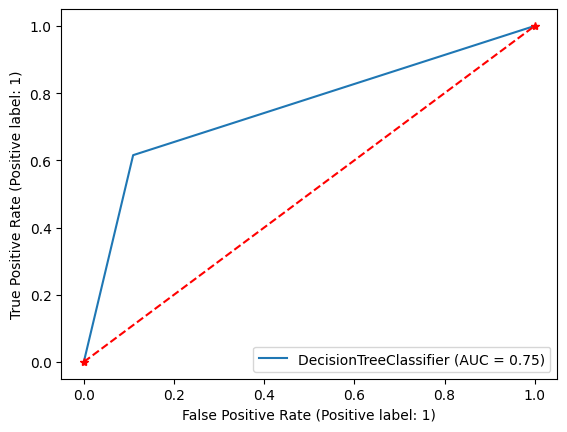

In [38]:
RocCurveDisplay.from_estimator(clf,xtest,ytest)
plt.plot([0,1],[0,1],"r*--")